<a href="https://colab.research.google.com/github/melked/traffic-sign/blob/main/Traffic_signs_reco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (14).json


{'kaggle (14).json': b'{"username":"meliikee","key":"fcda905a3ab819412015232039b59cfa"}'}

In [ ]:
import os
import shutil

os.makedirs('/root/.kaggle', exist_ok=True)
shutil.move('kaggle.json', '/root/.kaggle/')

os.chmod('/root/.kaggle/kaggle.json', 600)


Error: Destination path '/root/.kaggle/kaggle.json' already exists

In [ ]:
!pip install kaggle


In [ ]:
!kaggle datasets list


ref                                                            title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                       Car Price Dataset                                 135KB  2025-01-26 19:53:28           6508         85  1.0              
anandshaw2001/netflix-movies-and-tv-shows                      Netflix Movies and TV Shows                         1MB  2025-01-03 10:33:01          16330        428  1.0              
ankushpanday1/liver-cancer-predictions                         Liver Cancer Predictions                            9MB  2025-02-07 17:49:56            732         26  1.0              
avis02/electric-vehicle-population-data                        Electric Veh

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_file = "gtsrb-german-traffic-sign.zip"
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("data")



In [ ]:
os.listdir("data")



['Meta',
 'meta',
 'test',
 'train',
 'Train.csv',
 'Test',
 'Meta.csv',
 'Train',
 'Test.csv']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tqdm
import warnings


In [ ]:

import numpy as np
import os
from PIL import Image

data = []
labels = []
classes = 43  # 43 farklı sınıf var

for i in range(classes):
    path = os.path.join('/content/data', 'train', str(i))  # 'train' klasöründeki alt klasörler
    images = os.listdir(path)

    for j in images:
        try:
            image = Image.open(os.path.join(path, j))  # Görüntüleri doğru bir şekilde açıyoruz
            image = image.resize((30, 30))  # Görüntüleri 30x30 boyutuna yeniden boyutlandırıyoruz
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error loading image {j}: {e}")

# Veriyi numpy dizilerine dönüştürüyoruz
data = np.array(data)
labels = np.array(labels)

print(f"Veri seti boyutu: {data.shape}, Etiketler boyutu: {labels.shape}")



Veri seti boyutu: (39209, 30, 30, 3), Etiketler boyutu: (39209,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=68)

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, num_classes=43)
y_test = to_categorical(y_test, num_classes=43)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367, 43) (7842, 43)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 150s 149ms/step - accuracy: 0.4148 - loss: 2.1572 - val_accuracy: 0.9753 - val_loss: 0.0982
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 198s 145ms/step - accuracy: 0.9303 - loss: 0.2343 - val_accuracy: 0.9898 - val_loss: 0.0447
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 197s 140ms/step - accuracy: 0.9598 - loss: 0.1345 - val_accuracy: 0.9923 - val_loss: 0.0295
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 147s 145ms/step - accuracy: 0.9697 - loss: 0.1015 - val_accuracy: 0.9930 - val_loss: 0.0251
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 207s 150ms/step - accuracy: 0.9748 - loss: 0.0835 - val_accuracy: 0.9946 - val_loss: 0.0185
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 190s 139ms/step - accuracy: 0.9787 - loss: 0.0693 - val_accuracy: 0.9935 - val_loss: 0.0189
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 144s 141ms/step - accuracy: 0.9808 - loss: 0.0616 - val_accuracy: 0.9953 - val_loss: 0.0171
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 135s 138ms/step - accuracy: 0.9824 -

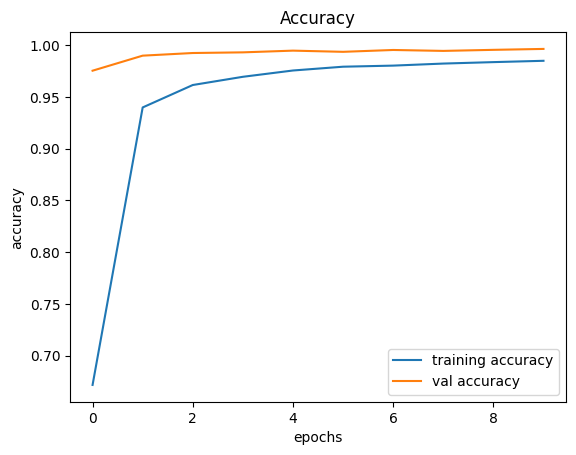

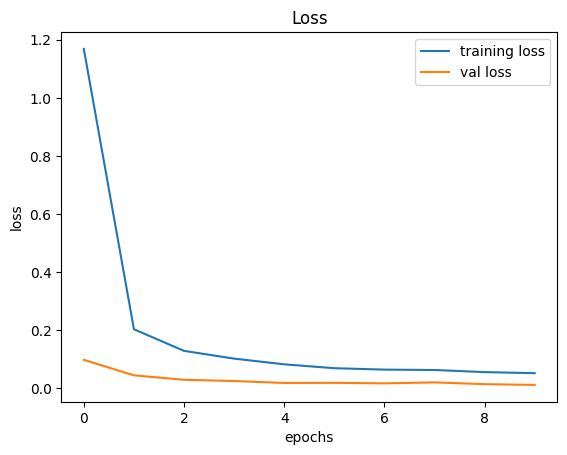

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test)) #Sonucun daha yüksek oranda doğru olması için 10 epoch.
model.save("Trafic_signs_model.h5")
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
#plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import os
from PIL import Image
from sklearn.metrics import accuracy_score

# Test verisini okumak için.
y_test = pd.read_csv("data/Test.csv")

labels = y_test["ClassId"].values
imgs = y_test["Path"].values


data = []

for img in imgs:

    img_path = os.path.join('/content/data', img)

    try:
        # Dosya gerçekten var mı?
        if os.path.exists(img_path):
            image = Image.open(img_path)
            image = image.resize((30, 30))
            data.append(np.array(image))
        else:
            print(f"Eksik dosya: {img_path}")
    except Exception as e:
        print(f"Hata oluştu {img_path} dosyasında: {e}")


X_test = np.array(data)

# Tahmin
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)  # Sınıf tahminlerini al

# Doğruluk hesabı
print("Test verisi doğruluğu:", accuracy_score(labels, pred))


395/395 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step
Test verisi doğruluğu: 0.9623911322248614


In [ ]:
# trafik işaretlerine driveden ulaşacağım.
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from PIL import Image
import numpy as np
from keras.models import load_model

model = load_model("Trafic_signs_model.h5")

class_labels = {
    0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)',
    9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection',
    12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution',
    19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve',
    22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right',
    25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing',
    29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing',
    32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead',
    35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight or left',
    38: 'Keep right', 39: 'Keep left', 40: 'Roundabout mandatory',
    41: 'End of no passing', 42: 'End of no passing by vehicles over 3.5 metric tons'
}

def preprocess_image(image_path):

    try:
        image = Image.open(image_path)

        if image.mode != "RGB":
            image = image.convert("RGB")

        image = image.resize((30, 30))
        image = np.array(image)

        image = image / 255.0

        image = image.reshape(1, 30, 30, 3)

        return image

    except Exception as e:
        print(f" Görüntü işleme hatası ({image_path}):", e)
        return None

def predict_traffic_signs(folder_path):

    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print(" Klasörde hiçbir görüntü bulunamadı!")
        return

    print(f" {len(image_files)} görüntü bulundu. İşleniyor...")

    for image_name in image_files:
        image_path = os.path.join(folder_path, image_name)
        processed_image = preprocess_image(image_path)

        if processed_image is not None:
            predictions = model.predict(processed_image)
            class_id = np.argmax(predictions)
            probability = np.max(predictions)

            print(f"{image_name}: {class_labels[class_id]} (%{round(probability * 100, 2)})")

#  Colab Notebooks klasörüne trafik işaretlerini ekledim oradaki fotografları değerlendirdim.
folder_path = "/content/drive/MyDrive/Colab Notebooks"
predict_traffic_signs(folder_path)


 13 görüntü bulundu. İşleniyor...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
101_Danger-ahead.png: General caution (%100.0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
112_Uneven-road.png: Bumpy road (%99.99)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
134_Zebra-crossing.png: Pedestrians (%100.0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
download.png: Traffic signals (%99.95)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
download (1).png: Speed limit (80km/h) (%99.99)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
downloa.jpeg: Turn right ahead (%98.84)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
z123.png: Road work (%100.0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
z206.png: Stop (%100.0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
z142-10.png: Speed limit (30km/h) (%100.0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
z274-100.png: Speed limit (100km/h) (%100.0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
z275-30.png: Keep left (%93.44)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
z103-20.png: Dangerous curve to the right (%100.0)
1/1 ━━━━━━━━━━━━━━━━━━━━ 